In [0]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import load_boston

sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [0]:
# loading the data
boston = load_boston()


This returns all keys and values as python dictionary. 

In [9]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Here you can view the data set description using boston.DESCR, which describes each feature in the data set.

In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

So MEDV is our target variable, which we need to predict and remaining are our features.

Now that we got our data loaded, let's get our data frame ready quickly and work ahead.

In [11]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()
# print the columns present in the dataset
print(df.columns)
# print the top 5 rows in the dataset
print(df.head()) 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [0]:
df['MEDV']=boston.target


In new overall dataframe let’s check if we have any missing values in the data set.

In [13]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

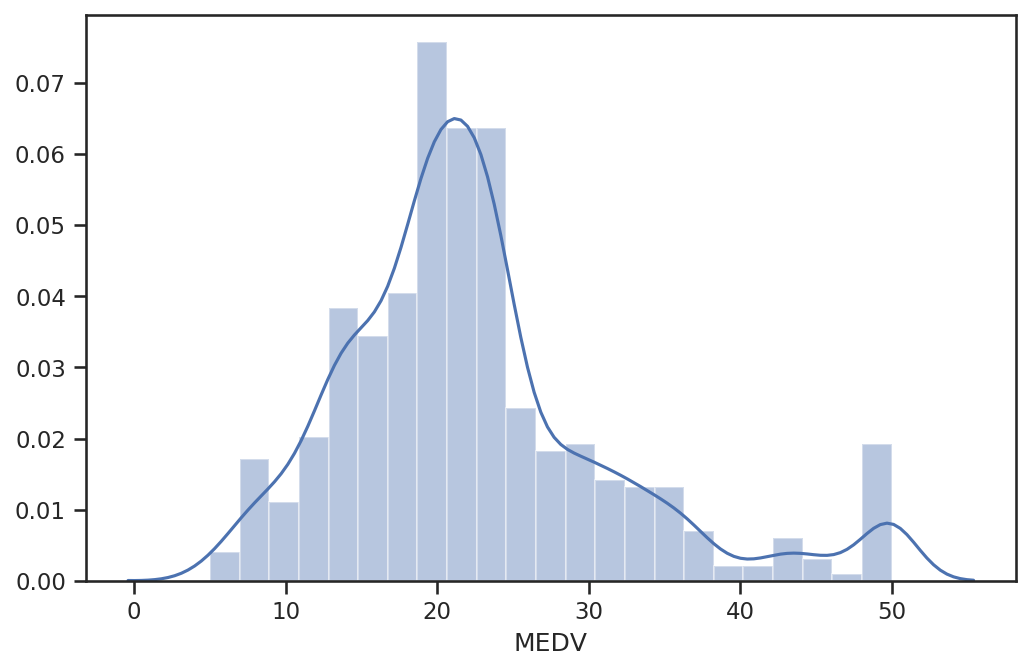

In [14]:
sns.distplot(df['MEDV'])
plt.show()

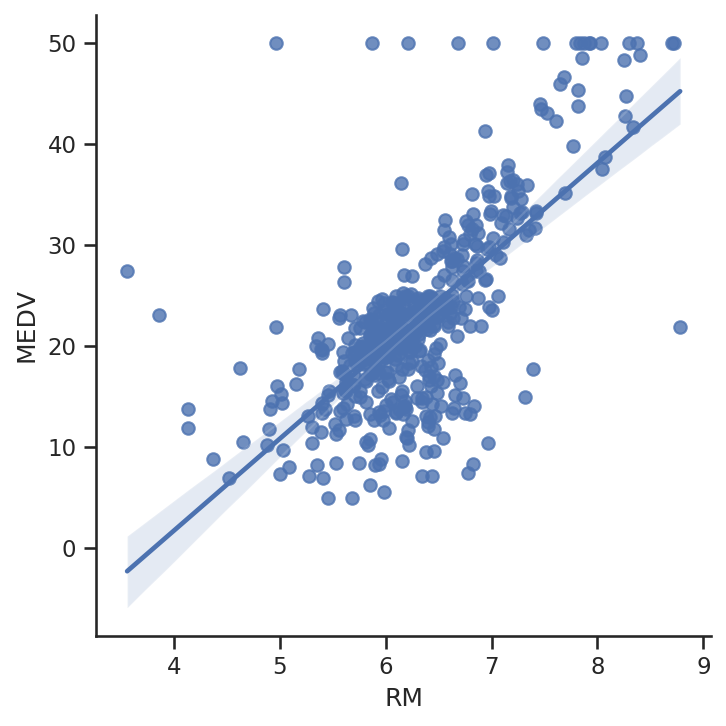

In [27]:
sns.lmplot(x = 'RM', y = 'MEDV', data = df)


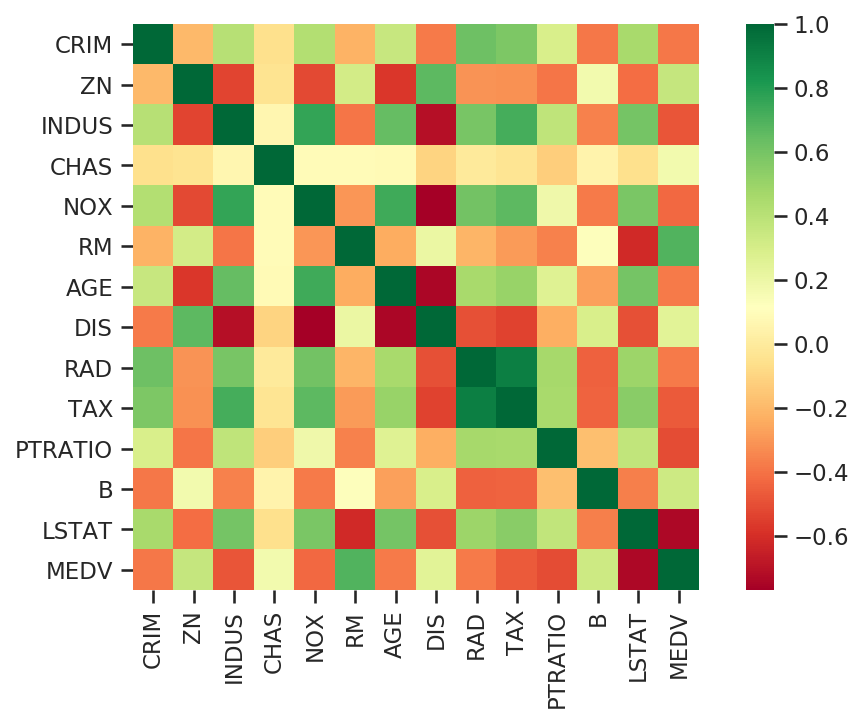

In [15]:
#plotting heatmap for overall data set
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [0]:
# Preparing the data
X = df[['RM']]
y = df[['MEDV']]

In [0]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [18]:
#Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Model Evaluation**



In [19]:
#check prediction score
regressor.score(X_test, y_test)

0.5383003344910231

In [20]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,25.153909
1,31.1,26.773693
2,23.5,22.284072
3,26.6,27.997335
4,19.6,14.484456
5,14.3,23.569336
6,50.0,32.839084
7,14.3,16.535597
8,20.7,19.026896
9,37.6,37.689635


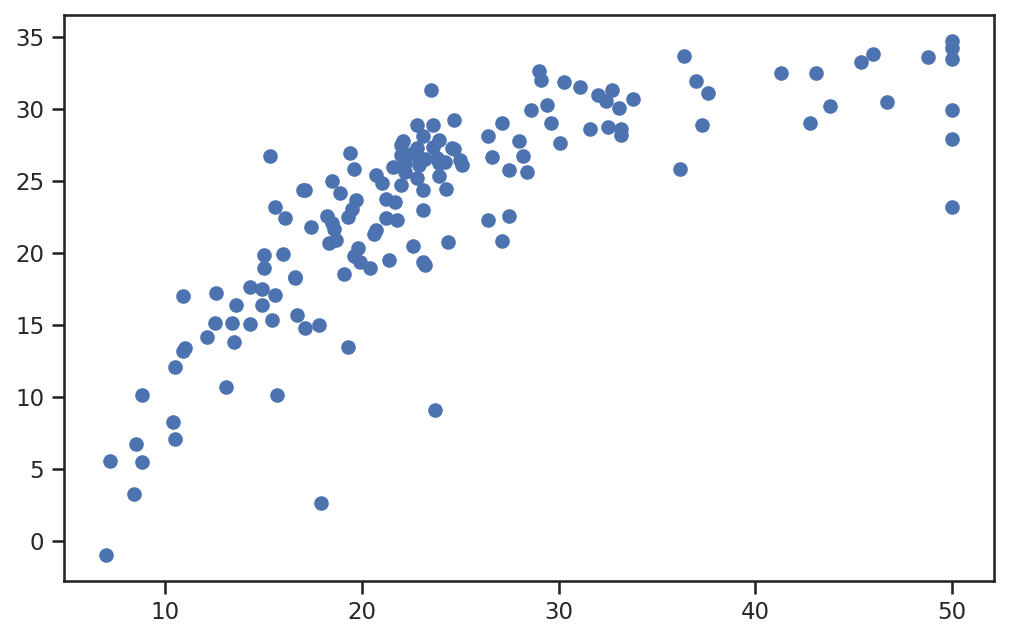

In [29]:
prediction = regressor.predict(X_test)
plt.scatter(y_test, prediction)


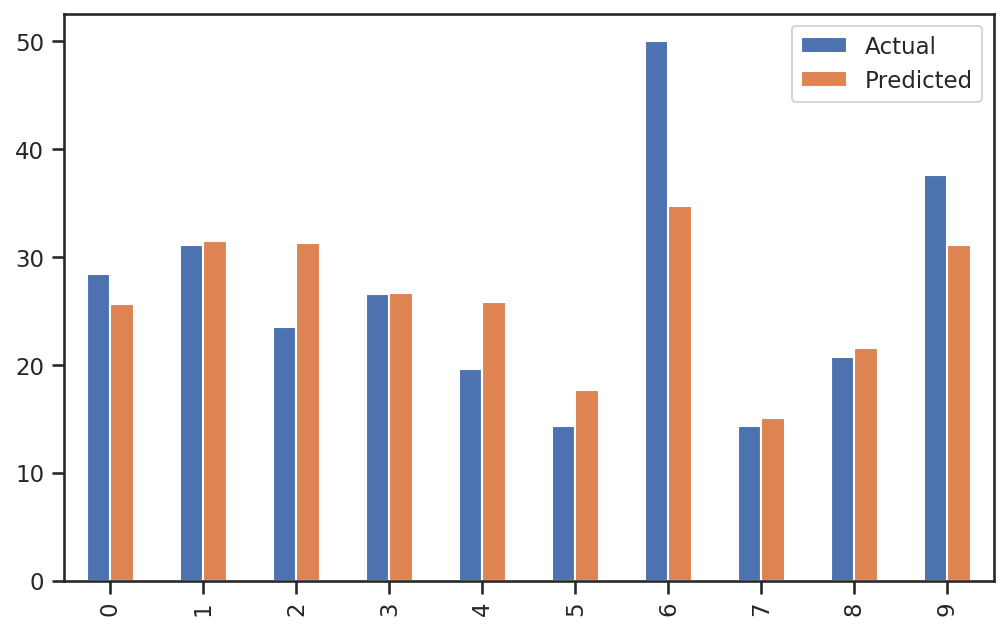

In [42]:
evaluate.head(10).plot(kind = 'bar')


In [21]:
# Scoring the model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")

# Mean Absolute Error (MAE)
print(f"MSE score: {mean_absolute_error(y_test, y_pred)}")

# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: 0.5383003344910231
MSE score: 4.750294229575126
MSE score: 45.07733942471831


**multiple linear regression**



In [22]:
# Preparing the data
X = df[['LSTAT','INDUS','CRIM','NOX','TAX','PTRATIO','CHAS','ZN','DIS']]
y = df[['MEDV']]

# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Fitting the training data to our model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
regressor.score(X_test, y_test)

0.6252457568746427

In [24]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,30.658930
1,31.1,33.018009
2,23.5,33.702006
3,26.6,22.368433
4,19.6,22.493467
5,14.3,16.686898
6,50.0,34.022211
7,14.3,16.033555
8,20.7,27.219152
9,37.6,32.235839


Let's make another multi linear regression model with more features.

In [25]:
# Preparing the data
X = df[['LSTAT','INDUS','CRIM','NOX','TAX','PTRATIO']]
y = df[['MEDV']]

# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

# Fitting the training data to our model
regressor.fit(X_train, y_train)

#score of this model
regressor.score(X_test, y_test)

0.5793234700425467

Accuracy of this model is 57%. Target variable's data frame for this built model is:

In [26]:
# predict the y values
y_pred=regressor.predict(X_test)
# a data frame with actual and predicted values of y
evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

,Actual,Predicted
0,28.4,25.600508
1,31.1,31.499773
2,23.5,31.273284
3,26.6,26.663841
4,19.6,25.813503
5,14.3,17.627132
6,50.0,34.706862
7,14.3,15.036885
8,20.7,21.604524
9,37.6,31.095820
